<a href="https://colab.research.google.com/github/sadrireza/Neural-Networks/blob/main/Saving_and_Loading_Functional_Models_in_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import json #for saving purposes
from tensorflow import keras
from tensorflow.keras import layers

##Sequential API

In [ ]:
model1_sequential = keras.Sequential([
    layers.Input(shape=(3,)),
    layers.Dense(3, activation='relu'),
    layers.Dense(1, activation='sigmoid'),
])
model1_sequential.name = 'Sequential Model'
model1_sequential.summary()

Model: "Sequential Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 3)                   │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16 (64.00 B)

 Trainable params: 16 (64.00 B)

 Non-trainable params: 0 (0.00 B)

##Functional API

In [ ]:
inputs = keras.Input(shape=(3,), name='my_input')
features = layers.Dense(3, activation='relu')(inputs)
outputs = layers.Dense(1, activation='sigmoid')(features)
model1_functional = keras.Model(inputs=inputs, outputs=outputs, name= 'Single-In-Out Model')

model1_functional.summary()

Model: "Single-In-Out Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ my_input (InputLayer)                │ (None, 3)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16 (64.00 B)

 Trainable params: 16 (64.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
inputs.dtype

'float32'

##Multi Input Multi Output Model

In [ ]:
input1 = layers.Input(shape=(3,), name= 'my input1')
input2 = layers.Input(shape=(5,), name= 'my input2')

concat1 = layers.concatenate([input1, input2])

layer1= layers.Dense(3, activation='relu')(concat1)
layer2= layers.Dense(4, activation='relu')(layer1)

concat2= layers.concatenate([layer1, layer2])

layer3= layers.Dense(3, activation= 'relu')(concat2)

output1= layers.Dense(1, activation= 'sigmoid', name='output1')(layer3)
output2= layers.Dense(5, activation= 'softmax', name= 'output2')(layer3)

model2_functional = keras.Model(inputs= [input1, input2], outputs= [output1, output2], name = 'Multi-In-Out Model')

model2_functional.summary()

Model: "Multi-In-Out Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ my input1 (InputLayer)    │ (None, 3)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ my input2 (InputLayer)    │ (None, 5)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 8)              │              0 │ my input1[0][0], my    │
│                           │                        │                │ input2[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_4 (Dense)           │ (None, 3)              │             27 │ concatenate[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_5 (Dense)           │ (None, 4)              │             16 │ dense_4[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_1             │ (None, 7)              │              0 │ dense_4[0][0],         │
│ (Concatenate)             │                        │                │ dense_5[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_6 (Dense)           │ (None, 3)              │             24 │ concatenate_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ output1 (Dense)           │ (None, 1)              │              4 │ dense_6[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ output2 (Dense)           │ (None, 5)              │             20 │ dense_6[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 91 (364.00 B)

 Trainable params: 91 (364.00 B)

 Non-trainable params: 0 (0.00 B)

## Save Model:

#1- Save Model's Architecture

In [ ]:
model_config = model1_functional.get_config()
#getting model as a dictionary

with open('model_config.json', 'w') as f:
    json.dump(model_config, f, indent=4)
    #it will be saved in the left part in files as .json
    #indent helps to show model clearer on colab (not in a single line)

#2- Save Model's Weights

In [ ]:
model1_functional.save_weights('model_weights.weights.h5')

#3- Save Model's Structure and Weights

In [ ]:
model1_functional.save('model.h5')
model1_functional.save('model.keras')

##Load

#1- Load Model's Architecture

In [ ]:
with open('model_config.json', 'r') as f:
    model_config = json.load(f)

model1_functional_a = keras.Model.from_config(model_config)
model1_functional_a.summary()

#we saved our model. then we deleted everything using disconnect and delet runtime
#then we load our model again

Model: "Single-In-Out Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ my_input (InputLayer)                │ (None, 3)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16 (64.00 B)

 Trainable params: 16 (64.00 B)

 Non-trainable params: 0 (0.00 B)

#2- Load Model's Weights

In [ ]:
model1_functional_a.load_weights('model_weights.weights.h5')

#3- Load full Model

In [ ]:
model1_functional_b = keras.models.load_model('model.h5')
model1_functional_b.summary()
#All these three models are the same

Model: "Single-In-Out Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ my_input (InputLayer)                │ (None, 3)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16 (64.00 B)

 Trainable params: 16 (64.00 B)

 Non-trainable params: 0 (0.00 B)

#Plot Model

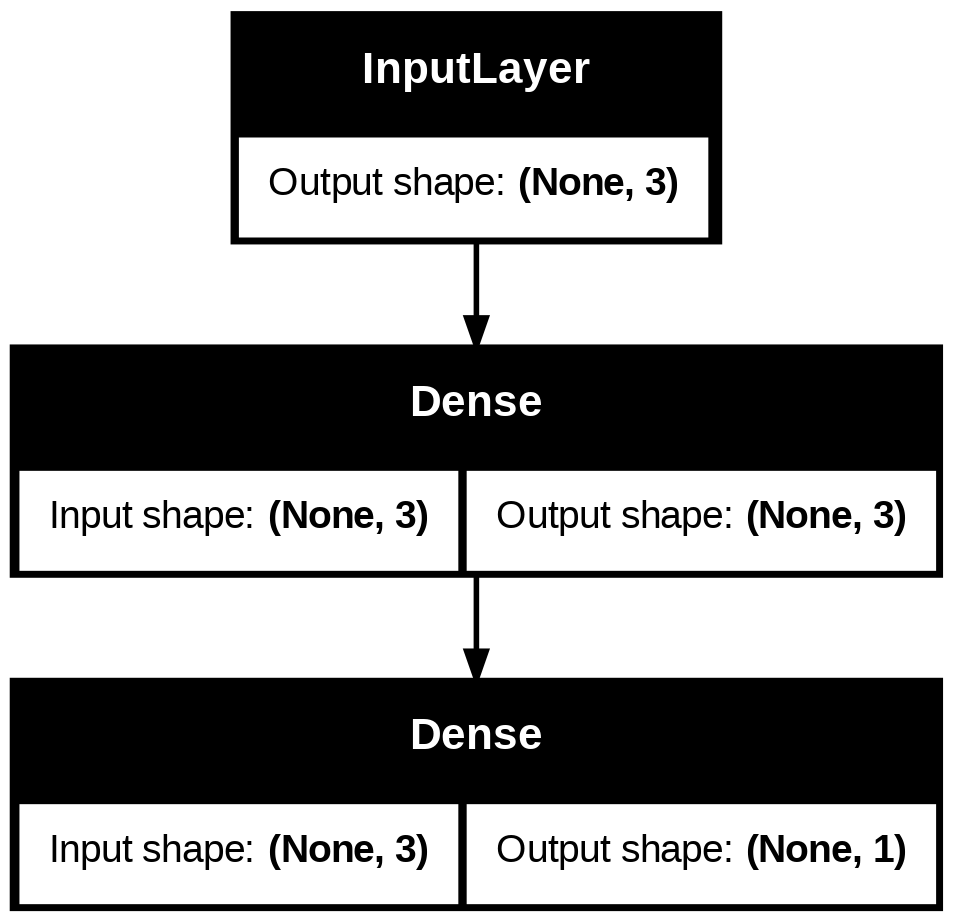

In [ ]:
keras.utils.plot_model(model1_functional, 'functional1_model.png', show_shapes=True)

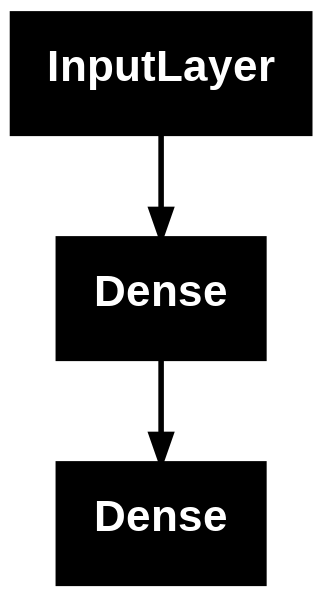

In [ ]:
keras.utils.plot_model(model1_functional_b, 'functional2_model.png')

In [ ]:
keras.utils.plot_model(model2_functional, 'functional_model.pdf', show_layer_activations=True, show_layer_names=True, show_dtype=True, show_shapes=True)
#saved as pdf file with a higher quality